### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
from statsmodels.stats import anova
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Import data

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# There are missing vlaues in bmi

In [7]:
df.id.nunique()

5110

In [8]:
df1 = df.copy()
df1.age = df.age.astype(int)

In [9]:
# age converted to int

In [10]:
df1.id.sort_values()

4230       67
2333       77
1010       84
2528       91
805        99
        ...  
270     72911
5083    72914
2629    72915
121     72918
4332    72940
Name: id, Length: 5110, dtype: int64

In [11]:
# Missing values in id column. Some data is missing.

In [12]:
df1.drop('id', axis=1, inplace=True)

In [13]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df1.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### Visualization

In [15]:
num_cols = df1.select_dtypes(include=np.number)
num_cols.drop(['hypertension', 'heart_disease', 'stroke'], axis=1, inplace=True)
cat_cols = df1.select_dtypes(include='object')
cat_cols = pd.concat([cat_cols, df1.loc[:, ['hypertension', 'heart_disease', 'stroke']]], axis=1)

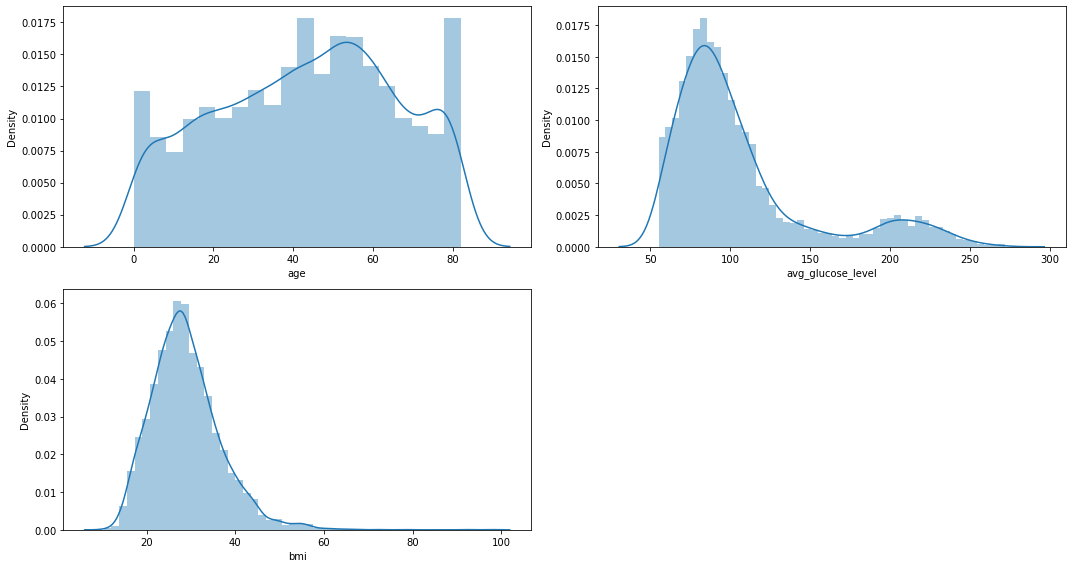

In [16]:
plt.rcParams['figure.figsize'] = [15, 8]
i = 1
for x in num_cols:
    plt.subplot(2, 2, i)
    sns.distplot(num_cols[x])
    i += 1
    
plt.tight_layout()

In [17]:
# Data appears to have normal-like shape

In [18]:
df1[df1.age == 0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [19]:
# People with age = 0  are new born babies

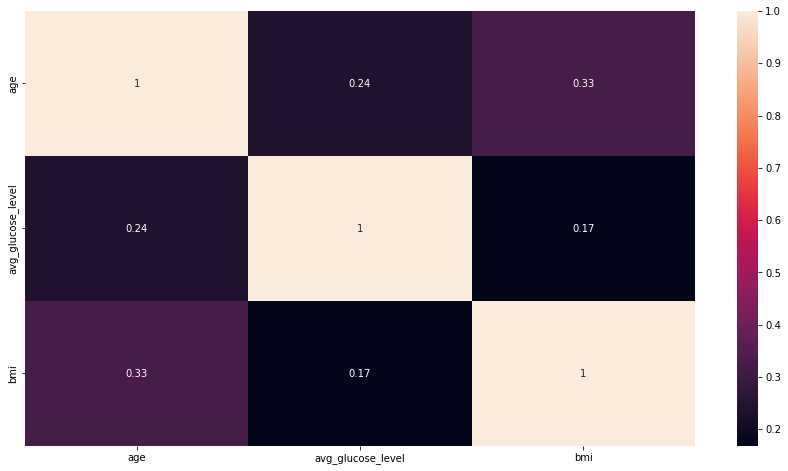

In [86]:
sns.heatmap(num_cols.corr(), annot=True)
plt.show()

In [87]:
# There does not seem to be high collinearity between variables

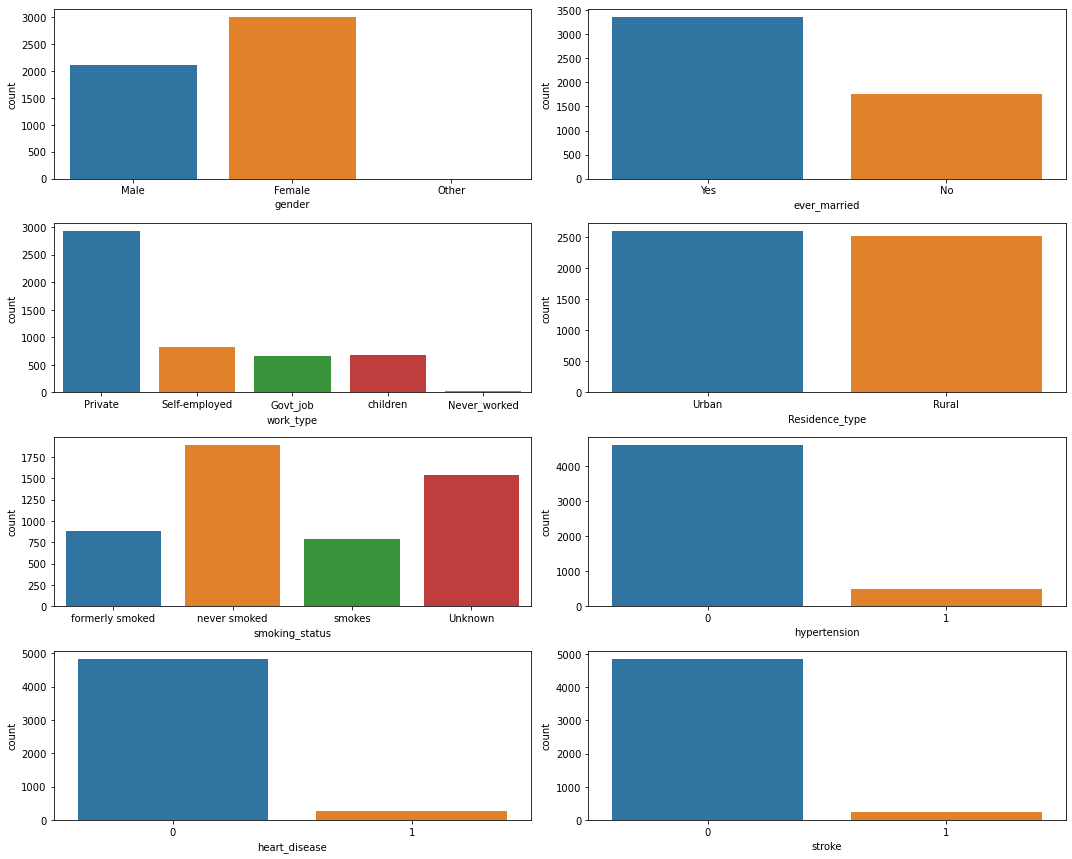

In [20]:
plt.figure(figsize=[15, 12])
i = 1
for x in cat_cols:
    plt.subplot(4, 2, i)
    sns.countplot(cat_cols[x])
    i += 1
    
plt.tight_layout()

In [21]:
# Majority Female patients
# Majority people have been married, working in Private sector, equal proportions of Rural and urban
# Many people have never smoked or the status is unknown, most people don't have a history of hypertension or heart_disease
# We have imbalanced target data

### Missing Values of BMI

In [23]:
model = ols("bmi ~ gender", data=df1).fit()
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
gender,2.0,249.393368,124.696684,2.022305,0.13246
Residual,4906.0,302507.282098,61.660677,NaN,NaN


In [24]:
model = ols("bmi ~ work_type", data=df1).fit()
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
work_type,4.0,61481.706012,15370.426503,312.409413,9.469087e-240
Residual,4904.0,241274.969453,49.199627,NaN,NaN


In [25]:
model = ols("bmi ~ smoking_status", data=df1).fit()
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
smoking_status,3.0,22523.940045,7507.980015,131.41449,6.947847e-82
Residual,4905.0,280232.735421,57.132056,NaN,NaN


In [26]:
model = ols("bmi ~ ever_married", data=df1).fit()
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
ever_married,1.0,35348.426771,35348.426771,648.651382,1.706536e-134
Residual,4907.0,267408.248695,54.495262,NaN,NaN


In [27]:
# Strong relations of bmi with work_type, smoking_status and ever_married
# We could use any of these columns to fill the missing values in bmi
# Although physically, smoking status seems to make more sense.
# So, we will use smoking status to impute the missing values of bmi.

In [28]:
df1.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [29]:
df1['bmi'] = df1.groupby('smoking_status')['bmi'].transform(lambda x:x.replace(to_replace=np.nan, value=x.mean()))

In [30]:
df1.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
# Missing values have been dealt with.

### Data Preparation

In [33]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,29.982559,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [32]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [34]:
num_cols = df1.select_dtypes(include=np.number)
num_cols.drop(['hypertension', 'heart_disease', 'stroke'], axis=1, inplace=True)
cat_cols = df1.select_dtypes(include='object')
cat_cols = pd.concat([cat_cols, df1.loc[:, ['hypertension', 'heart_disease']]], axis=1)

In [37]:
pw = PowerTransformer()
num_trans = pd.DataFrame(pw.fit_transform(num_cols), columns=num_cols.columns)

sc = StandardScaler()
num_scaled = pd.DataFrame(sc.fit_transform(num_trans), columns=num_trans.columns)
num_scaled.shape

(5110, 3)

In [40]:
dummy_data = pd.get_dummies(cat_cols, drop_first=True)

In [44]:
df_final = pd.concat([df1['stroke'], num_scaled, dummy_data], axis=1)
df_final.head()

,stroke,age,avg_glucose_level,bmi,hypertension,heart_disease,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.031809,1.862358,1.038962,0,1,1,0,1,0,1,0,0,1,1,0,0
1,1,0.787819,1.700414,0.270338,0,0,0,0,1,0,0,1,0,0,0,1,0
2,1,1.550411,0.394714,0.580885,0,1,1,0,1,0,1,0,0,0,0,1,0
3,1,0.289294,1.444941,0.799889,0,0,0,0,1,0,1,0,0,1,0,0,1
4,1,1.510962,1.472748,-0.585060,1,0,0,0,1,0,0,1,0,0,0,1,0


In [45]:
X = df_final.drop('stroke', axis=1)
y = df_final['stroke']

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape

((4088, 16), (1022, 16))

### Modeling

#### Logistic Regression

In [49]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain, ytrain)
print(lr.score(xtrain, ytrain), lr.score(xtest, ytest))

pred_train_lr = lr.predict(xtrain)
print(confusion_matrix(ytrain, pred_train_lr))
print(classification_report(ytrain, pred_train_lr))

pred_test_lr = lr.predict(xtest)
print(confusion_matrix(ytest, pred_test_lr))
print(classification_report(ytest, pred_test_lr))

0.7377690802348337 0.7475538160469667
[[2863 1038]
 [  34  153]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      3901
           1       0.13      0.82      0.22       187

    accuracy                           0.74      4088
   macro avg       0.56      0.78      0.53      4088
weighted avg       0.95      0.74      0.81      4088

[[714 246]
 [ 12  50]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       960
           1       0.17      0.81      0.28        62

    accuracy                           0.75      1022
   macro avg       0.58      0.78      0.56      1022
weighted avg       0.93      0.75      0.81      1022



In [50]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(xtrain, ytrain)
print(dt.score(xtrain, ytrain), dt.score(xtest, ytest))

pred_train_dt = dt.predict(xtrain)
print(confusion_matrix(ytrain, pred_train_dt))
print(classification_report(ytrain, pred_train_dt))

pred_test_dt = dt.predict(xtest)
print(confusion_matrix(ytest, pred_test_dt))
print(classification_report(ytest, pred_test_dt))

1.0 0.913894324853229
[[3901    0]
 [   0  187]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3901
           1       1.00      1.00      1.00       187

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088

[[928  32]
 [ 56   6]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       960
           1       0.16      0.10      0.12        62

    accuracy                           0.91      1022
   macro avg       0.55      0.53      0.54      1022
weighted avg       0.90      0.91      0.90      1022



In [53]:
tuned_params = [{'max_depth':range(4, 12),
                'min_samples_split':range(6, 15),
                'max_leaf_nodes':range(6, 20, 2)}]

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

dt_grid = GridSearchCV(dt, param_grid=tuned_params, cv=5, scoring='roc_auc')
dt_grid.fit(xtrain, ytrain)
dt_grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 8, 'min_samples_split': 6}

In [69]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, max_leaf_nodes=8, min_samples_split=6, class_weight='balanced', random_state=42)
dt.fit(xtrain, ytrain)
print(dt.score(xtrain, ytrain), dt.score(xtest, ytest))

pred_train_dt = dt.predict(xtrain)
print(confusion_matrix(ytrain, pred_train_dt))
print(classification_report(ytrain, pred_train_dt))

pred_test_dt = dt.predict(xtest)
print(confusion_matrix(ytest, pred_test_dt))
print(classification_report(ytest, pred_test_dt))

0.7722602739726028 0.7798434442270059
[[3006  895]
 [  36  151]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      3901
           1       0.14      0.81      0.24       187

    accuracy                           0.77      4088
   macro avg       0.57      0.79      0.56      4088
weighted avg       0.95      0.77      0.84      4088

[[755 205]
 [ 20  42]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       960
           1       0.17      0.68      0.27        62

    accuracy                           0.78      1022
   macro avg       0.57      0.73      0.57      1022
weighted avg       0.93      0.78      0.83      1022



#### Random Forest

In [55]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(xtrain, ytrain)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

pred_train_rf = rf.predict(xtrain)
print(confusion_matrix(ytrain, pred_train_rf))
print(classification_report(ytrain, pred_train_rf))

pred_test_rf = rf.predict(xtest)
print(confusion_matrix(ytest, pred_test_rf))
print(classification_report(ytest, pred_test_rf))

1.0 0.9393346379647749
[[3901    0]
 [   0  187]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3901
           1       1.00      1.00      1.00       187

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088

[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [56]:
tuned_params = [{'max_depth':range(4, 12),
                'min_samples_split':range(6, 15),
                'max_leaf_nodes':range(6, 20, 2)}]

rf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

rf_grid = GridSearchCV(rf, param_grid=tuned_params, cv=5, scoring='roc_auc')
rf_grid.fit(xtrain, ytrain)
rf_grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 8, 'min_samples_split': 6}

In [90]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_leaf_nodes=8, min_samples_split=6, class_weight='balanced', random_state=42)
rf.fit(xtrain, ytrain)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

pred_train_rf = rf.predict(xtrain)
print(confusion_matrix(ytrain, pred_train_rf))
print(classification_report(ytrain, pred_train_rf))

pred_test_rf = rf.predict(xtest)
print(confusion_matrix(ytest, pred_test_rf))
print(classification_report(ytest, pred_test_rf))

0.7103718199608611 0.723091976516634
[[2742 1159]
 [  25  162]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      3901
           1       0.12      0.87      0.21       187

    accuracy                           0.71      4088
   macro avg       0.56      0.78      0.52      4088
weighted avg       0.95      0.71      0.79      4088

[[687 273]
 [ 10  52]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       960
           1       0.16      0.84      0.27        62

    accuracy                           0.72      1022
   macro avg       0.57      0.78      0.55      1022
weighted avg       0.94      0.72      0.80      1022



In [58]:
# Our Logistic Model seems to have a better overall performance when looked at from the perspecetive of recall and accuracy

In [71]:
lr = LogisticRegression(class_weight='balanced')
scores_lr = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print(scores_lr)
print(scores_lr.mean())

[0.73287671 0.7446184  0.71037182 0.73581213 0.76712329]
0.738160469667319


In [72]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_leaf_nodes=8, min_samples_split=6, class_weight='balanced', random_state=42)
scores_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(scores_rf)
print(scores_rf.mean())

[0.71135029 0.70841487 0.68003914 0.69471624 0.7260274 ]
0.7041095890410958


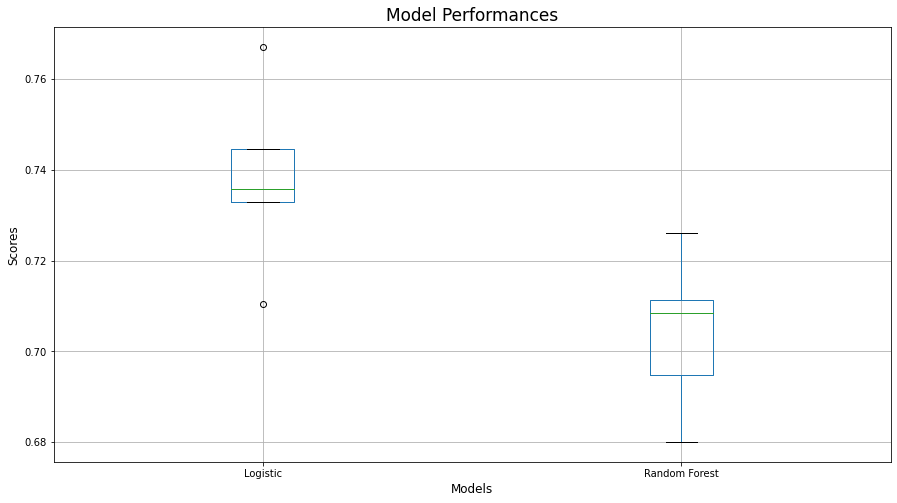

In [84]:
df_cv = pd.DataFrame({'Logistic':scores_lr, 'Random Forest':scores_rf})
df_cv.boxplot()
plt.title('Model Performances', fontsize=17)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.show()

In [85]:
# We can see that Logistic is giving better results and hence, it will be our final model

### Interpretation

In [92]:
feat_imp = pd.DataFrame({'Feature':xtrain.columns, 'Imp':rf.feature_importances_}).sort_values(by='Imp', ascending=False)
feat_imp.head()

,Feature,Imp
0,age,0.513286
1,avg_glucose_level,0.143793
2,bmi,0.102342
7,ever_married_Yes,0.084656
3,hypertension,0.046694


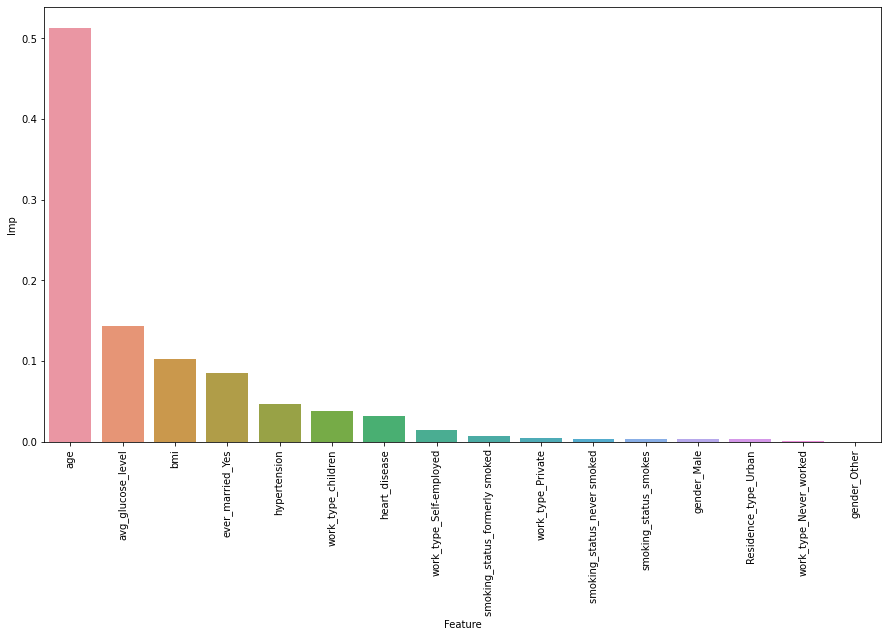

In [98]:
sns.barplot(feat_imp.Feature, feat_imp.Imp)
plt.xticks(rotation=90)
plt.show()

In [99]:
# Therefore, a person's age, avg_glucose_level, bmi, married_status and hypertension history are the top 5 important
# features needed to predict whether a person will suffer a stroke or not